Accuracy on random data: 56.00%


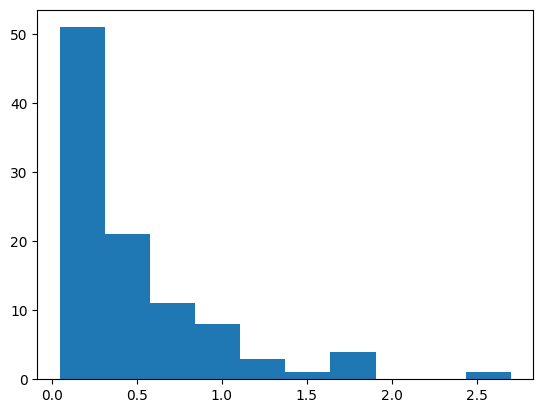

In [57]:
import pickle
import random
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

MAX_EPOCHS_FACTOR = 1000
DISTRIBUTION = "uniform"


# Function to generate random patterns and labels
def generate_random_data(num_samples, num_features, distribution=DISTRIBUTION):
    # X = np.random.randint(0, 2, (num_samples, num_features))  # Random binary patterns
    if distribution == "uniform":
        X = np.random.rand(num_samples, num_features)
    elif distribution == "gaussian":
        X = np.random.randn(num_samples, num_features)
    y = np.random.choice([-1, 1], num_samples)  # Random binary labels (-1 or 1)
    return X, y


# Perceptron model
class Perceptron:
    def __init__(
        self,
        num_features,
        learning_rate=0.00005,
        max_epochs=1000,
        learning_rule: str = "amit",  # "amit" or "clipped"
    ):
        self.weights = np.zeros(num_features)
        self.bias = 0
        self.learning_rate = learning_rate
        self.max_epochs = num_features * MAX_EPOCHS_FACTOR  # max_epochs
        self.learning_rule = learning_rule

    def predict(self, x):
        return 1 if np.dot(x, self.weights) + self.bias >= 0 else -1

    def fit(self, X, y):
        for epoch in range(self.max_epochs):
            errors = 0
            for xi, target in zip(X, y):
                prediction = self.predict(xi)
                if target != prediction:
                    # learning rule 1:
                    if self.learning_rule == "amit":
                        self.weights += self.learning_rate * xi * target
                        self.weights[self.weights < 0] = 0

                    # learning rule 2:
                    elif self.learning_rule == "clipped":
                        delta_weights = self.learning_rate * xi * target
                        sign_change = (self.weights + delta_weights) >= 0
                        self.weights[sign_change] = (
                            self.weights[sign_change] + delta_weights[sign_change]
                        )
                    self.bias += self.learning_rate * target
                    errors += 1
            # Stop if no errors in epoch (converged)
            if errors == 0:
                # print(f"Converged after {epoch + 1} epochs")
                break
        else:
            # print("Reached maximum epochs without full convergence")
            pass

    def score(self, X, y):
        predictions = [self.predict(xi) for xi in X]
        accuracy = np.mean(predictions == y)
        return accuracy


# Parameters
num_samples = 200  # Number of random patternss
num_features = 100  # Number of features per pattern

# Generate random data
X, y = generate_random_data(num_samples, num_features)

# Initialize Perceptron and train
perceptron = Perceptron(
    num_features=num_features,
    learning_rate=0.1,
    max_epochs=100,
    learning_rule="clipped",
)
perceptron.fit(X, y)

# Evaluate performance
accuracy = perceptron.score(X, y)
print(f"Accuracy on random data: {accuracy * 100:.2f}%")

plt.hist(perceptron.weights, bins=10)
plt.show()


In [52]:
class TrainPerceptron:
    def __init__(self, num_samples, num_features, learning_rule):
        self.num_samples = num_samples
        self.num_features = num_features
        self.perceptron = Perceptron(
            num_features=num_features,
            learning_rate=0.1,
            max_epochs=100,
            learning_rule=learning_rule,
        )

    def train(self):
        X, y = generate_random_data(self.num_samples, self.num_features)
        self.perceptron.fit(X, y)
        return self.perceptron.score(X, y)


repeat = 10
average_accuracy = []
for _ in range(repeat):
    train_perceptron = TrainPerceptron(num_samples=20, num_features=10)
    accuracy = train_perceptron.train()
    average_accuracy.append((accuracy == 1))
print(f"Average accuracy: {np.mean(average_accuracy) * 100:.2f}%")


TypeError: TrainPerceptron.__init__() missing 1 required positional argument: 'learning_rule'

In [47]:
import numpy as np
from joblib import Parallel, delayed


def single_trial(num_samples, num_features, learning_rule):
    train_perceptron = TrainPerceptron(
        num_samples=num_samples, num_features=num_features, learning_rule=learning_rule
    )
    accuracy = train_perceptron.train()
    return accuracy == 1


def get_success_rate(num_samples=20, num_features=10, repeat=20, learning_rule="amit"):
    # Run trials in parallel using joblib

    results = Parallel(n_jobs=8)(
        delayed(single_trial)(num_samples, num_features, learning_rule)
        for _ in range(repeat)
    )

    results = np.array(results)
    return (np.mean(results), np.std(results) / np.sqrt(repeat), results.tolist())


------------------------
N = 10, P = 8, success rate = 0.9
N = 10, P = 9, success rate = 0.8
N = 10, P = 10, success rate = 0.65
N = 10, P = 11, success rate = 0.5
N = 10, P = 12, success rate = 0.65
N = 10, P = 13, success rate = 0.45
N = 10, P = 14, success rate = 0.4
[[10, 1.3774030974587987, 0.14709323284400402]]
------------------------
N = 20, P = 16, success rate = 0.9
N = 20, P = 17, success rate = 0.9
N = 20, P = 18, success rate = 0.7
N = 20, P = 19, success rate = 0.75
N = 20, P = 20, success rate = 0.65
N = 20, P = 21, success rate = 0.5
N = 20, P = 22, success rate = 0.4
N = 20, P = 23, success rate = 0.35
N = 20, P = 24, success rate = 0.25
[[10, 1.3774030974587987, 0.14709323284400402], [20, 1.1438002372791822, 0.06347997816208155]]
------------------------
N = 50, P = 40, success rate = 0.85
N = 50, P = 42, success rate = 0.95
N = 50, P = 44, success rate = 0.8
N = 50, P = 46, success rate = 0.85
N = 50, P = 48, success rate = 0.55
N = 50, P = 50, success rate = 0.4
N =

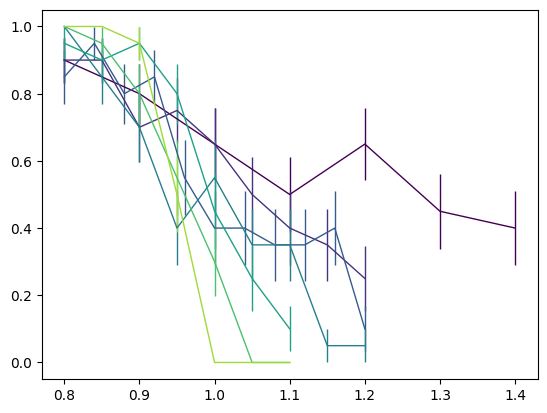

In [58]:
# plot capacity


success_rate = defaultdict(list)
experi = {}
# Create color map
cmap = plt.cm.viridis  # or any other colormap
N_values = [10, 20, 50, 100, 200, 500, 1000]
colors = {N: cmap(i / len(N_values)) for i, N in enumerate(N_values)}
capacity = []
learning_rule = "amit"
for N in N_values:
    experi[N] = {}
    print("------------------------")

    if N == 10:
        min_N, max_N, step = 8, 15, 1

    elif N < 200:
        min_N, max_N, step = int(N * 0.8), int(N * 1.2) + 1, int(N * 0.05)
    elif N < 500:
        min_N, max_N, step = int(N * 0.8), int(N * 1.1) + 1, int(N * 0.05)
    else:
        min_N, max_N, step = int(N * 0.8), int(N * 1.1) + 1, int(N * 0.05)
    for P in range(min_N, max_N, step):
        ave_success_rate, std_success_rate, exp = get_success_rate(
            num_samples=P, num_features=N, learning_rule=learning_rule
        )
        experi[N][P] = exp
        print("N = {}, P = {}, success rate = {}".format(N, P, ave_success_rate))

        success_rate[N].append((P, ave_success_rate, std_success_rate))
    with open(
        "perceptron_sign_constrained_experi_max_iter_factor_{}_{}_{}.pkl".format(
            MAX_EPOCHS_FACTOR, DISTRIBUTION, learning_rule
        ),
        "wb",
    ) as f:
        pickle.dump(experi, f)

    sample = 100
    psedoC = []
    for i in range(sample):
        psedoX = []
        psedoY = []

        for P in experi[N]:
            psedoX += [P / N] * len(experi[N][P])
            psedoY += random.choices(experi[N][P], k=len(experi[N][P]))
        if min(psedoY) == max(psedoY):
            continue
        clf = LogisticRegression().fit(
            np.array(psedoX).reshape(-1, 1), np.array(psedoY)
        )
        newX = np.linspace(min(experi[N].keys()) / N, max(experi[N].keys()) / N, 20)
        if np.abs(-clf.intercept_[0] / clf.coef_[0][0]) > 20:
            continue
        psedoC.append(-clf.intercept_[0] / clf.coef_[0][0])

        probs = clf.predict_proba(newX.reshape(-1, 1))

        # plt.plot(
        #     newX,
        #     probs[:, 1],
        #     alpha=0.15,
        #     linewidth=0.5,
        #     color=colors[N],
        # )

    capacity.append([N, np.nanmean(np.array(psedoC)), np.nanstd(np.array(psedoC))])

    plt.errorbar(
        np.array(list(experi[N].keys())) / N,
        [np.mean(np.array(experi[N][P])) for P in experi[N]],
        yerr=[
            np.std(np.array(experi[N][P])) / np.sqrt(len(experi[N][P]))
            for P in experi[N]
        ],
        label="N=" + str(N),
        linewidth=1,
        color=colors[N],
    )
    print(capacity)
    with open(
        "perceptron_sign_constrained_capacity_{}_{}.pkl".format(
            DISTRIBUTION, learning_rule
        ),
        "wb",
    ) as f:
        pickle.dump(capacity, f)

    # plt.errorbar(
    #     [np.array(psedoC).mean()],
    #     [0.5],
    #     xerr=np.array(psedoC).std(),
    #     fmt="o",
    #     linewidth=2,
    #     capsize=2,
    #     color=colors[N],
    # )
print(success_rate)


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/

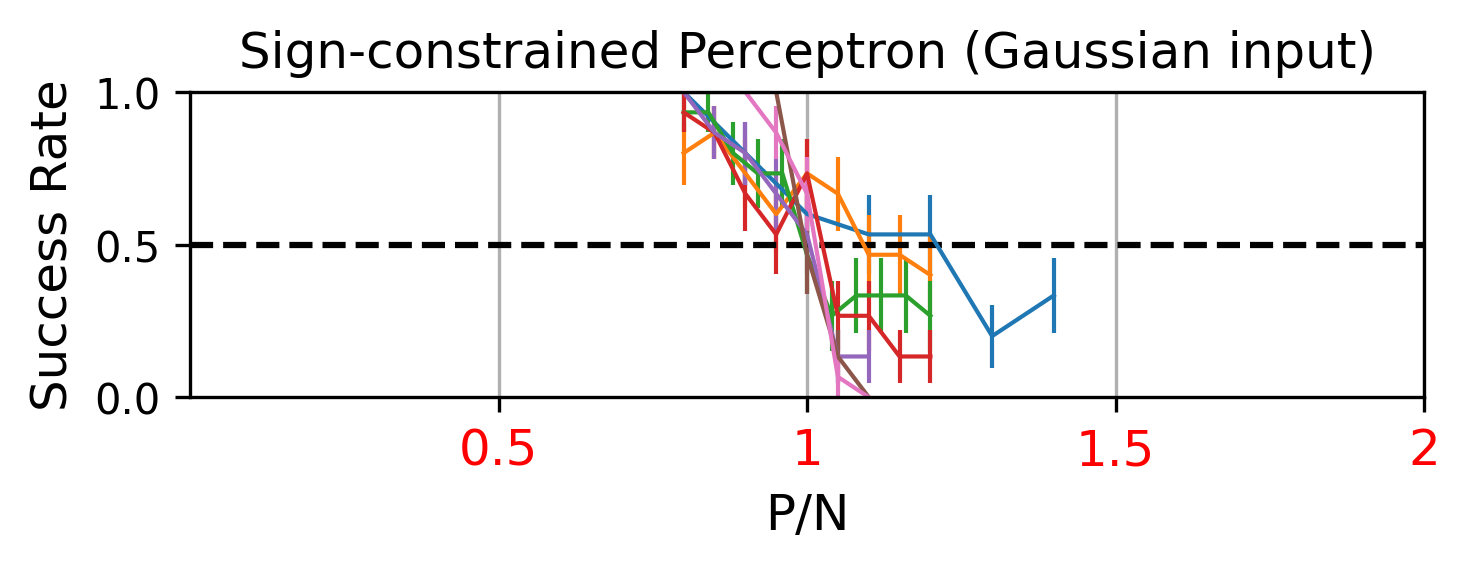

In [43]:
import pickle
import random

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

MAX_EPOCHS_FACTOR = 500
DISTRIBUTION = "gaussian"
with open(
    "perceptron_sign_constrained_experi_max_iter_factor_{}_{}.pkl".format(
        MAX_EPOCHS_FACTOR, DISTRIBUTION
    ),
    "rb",
) as f:
    experi = pickle.load(f)
# Create color map
cmap = plt.cm.viridis.colors  # or any other colormap
N_values = [10, 20, 50, 100, 200, 500, 1000]
if DISTRIBUTION == "uniform":
    with open(
        "perceptron_sign_constrained_experi_max_iter_factor_{}_{}_N_1000.pkl".format(
            MAX_EPOCHS_FACTOR, DISTRIBUTION
        ),
        "rb",
    ) as f:
        experi2 = pickle.load(f)
    experi[1000] = experi2[1000]
all_N = [10, 20, 50, 100, 200, 500, 800, 1000, 2000, 5000]
colors = plt.cm.tab10.colors
capacity = []
sample_ratio = 0.5
plt.figure(figsize=(5, 2), dpi=300)
for N in N_values:
    sample = 5
    psedoC = []
    for i in range(sample):
        psedoX = []
        psedoY = []

        for P in experi[N]:
            psedoX += [P / N] * int(len(experi[N][P]) * sample_ratio)
            psedoY += random.sample(
                experi[N][P], k=int(len(experi[N][P]) * sample_ratio)
            )

        if min(psedoY) == max(psedoY):
            continue
        clf = LogisticRegression(penalty="none").fit(
            np.array(psedoX).reshape(-1, 1), np.array(psedoY)
        )
        newX = np.linspace(min(experi[N].keys()) / N, max(experi[N].keys()) / N, 20)
        if np.abs(-clf.intercept_[0] / clf.coef_[0][0]) > 20:
            continue
        psedoC.append(-clf.intercept_[0] / clf.coef_[0][0])

        probs = clf.predict_proba(newX.reshape(-1, 1))

        # plt.plot(
        #     newX,
        #     probs[:, 1],
        #     alpha=0.15,
        #     linewidth=0.5,
        #     color=colors[N],
        # )

    capacity.append([N, np.nanmean(np.array(psedoC)), np.nanstd(np.array(psedoC))])

    plt.errorbar(
        np.array(list(experi[N].keys())) / N,
        [np.mean(np.array(experi[N][P])) for P in experi[N]],
        yerr=[
            np.std(np.array(experi[N][P])) / np.sqrt(len(experi[N][P]))
            for P in experi[N]
        ],
        label="N=" + str(N),
        linewidth=1,
        color=colors[N_values.index(N)],
    )
# plt.legend(fontsize=8, loc=[0.8, 0.1])
plt.plot([0, 2.5], [0.5, 0.5], "k--")
plt.xlim([0, 2])
plt.xticks([0.5, 1, 1.5, 2], fontsize=12, labels=[0.5, 1, 1.5, 2], color="r")
plt.ylim([0, 1])
plt.xlabel("P/N", fontsize=12)
plt.ylabel("Success Rate", fontsize=12)
plt.title("Sign-constrained Perceptron (Gaussian input)", fontsize=12)
plt.grid(True, axis="x")
plt.savefig(
    "perceptron_success_rate_max_iter_factor_{}_{}.pdf".format(
        MAX_EPOCHS_FACTOR, DISTRIBUTION
    ),
    dpi=300,
)
plt.tight_layout()
plt.show()


In [32]:
for P in experi[1000]:
    print(P, sum(experi[1000][P]) / len(experi[1000][P]))

800 1.0
850 1.0
900 1.0
950 0.8666666666666667
1000 0.6666666666666666
1050 0.06666666666666667
1100 0.0


In [40]:
for P in experi[1000]:
    print(P, ":", [1 if x == 1 else 0 for x in experi[1000][P]], ",")


800 : [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] ,
850 : [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] ,
900 : [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] ,
950 : [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1] ,
1000 : [1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1] ,
1050 : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0] ,
1100 : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] ,


[[10, 1.0578847618700498, 0.040998368729813696], [20, 1.09733995709563, 0.009142317202987542], [50, 1.0026725716974731, 0.026595881107690726], [100, 0.9586152474721198, 0.01800788206594142], [200, 0.9632579981886333, 0.009989769589398966], [500, 0.9521261842960895, 0.013211776460884658], [1000, 0.9430612773543444, 0.010315675792091743]]


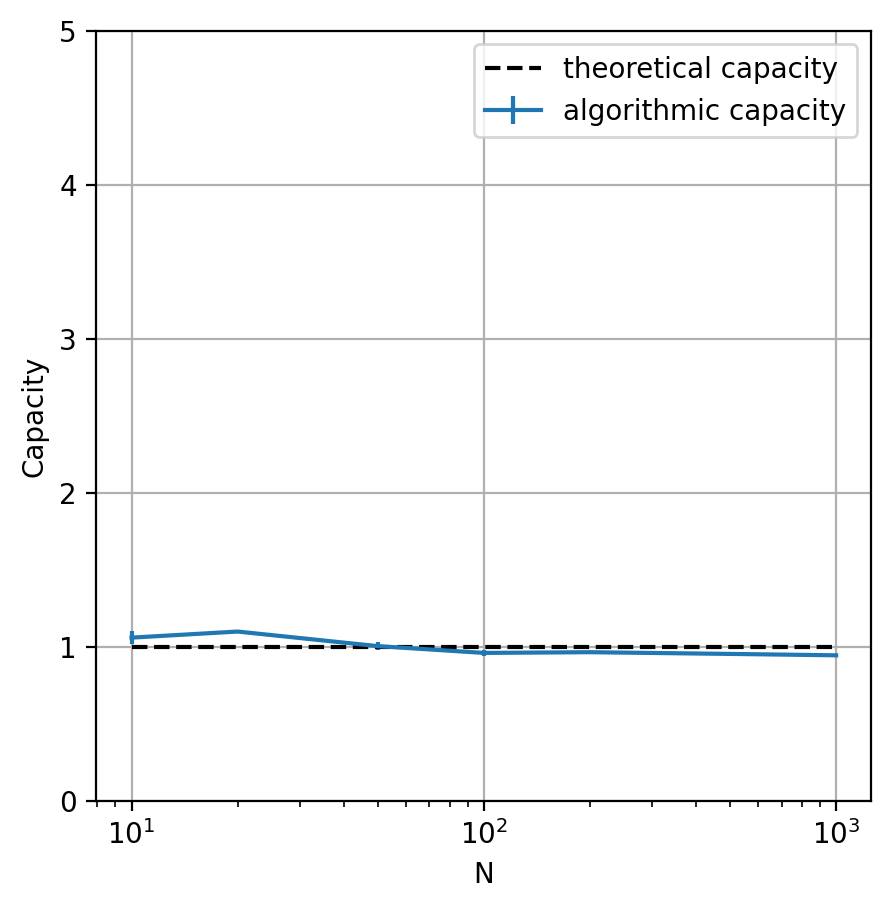

In [14]:
plt.figure(figsize=(5, 5), dpi=200)
print(capacity)
N = [c[0] for c in capacity]
C = [c[1] for c in capacity]
err = [c[2] for c in capacity]
plt.errorbar(
    N,
    C,
    yerr=err,
    # label="N=" + str(N),
    # color=colors[N],
    label="algorithmic capacity",
)
plt.plot(
    N,
    np.ones((len(N),)) * 1,
    label="theoretical capacity",
    color="k",
    linestyle="--",
)
plt.xscale("log")
plt.ylim([0, 5])
plt.legend()
plt.xlabel("N")
plt.ylabel("Capacity")
plt.grid(True)
plt.savefig(
    "perceptron_capacity_sign_constrained_max_iter_factor_{}_{}.pdf".format(
        MAX_EPOCHS_FACTOR, DISTRIBUTION
    ),
    dpi=300,
)
plt.show()
with open(
    "perceptron_capacity_sign_constrained_max_iter_factor_{}_{}.pkl".format(
        MAX_EPOCHS_FACTOR, DISTRIBUTION
    ),
    "wb",
) as f:
    pickle.dump(capacity, f)

In [28]:
C

[1.3924110642110563,
 2.1753771175362333,
 1.0995745131212151,
 1.0631198529937917,
 1.2498247379561018,
 1.3186484496704696,
 1.3651520776435924]

In [8]:
import pickle

with open(
    "perceptron_sign_constrained_experi_max_iter_factor_{}_{}.pkl".format(
        MAX_EPOCHS_FACTOR, DISTRIBUTION
    ),
    "rb",
) as f:
    perceptron_sign_constrained = pickle.load(f)

In [ ]:
import random

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

capacity = []
N_list = list(perceptron_sign_constrained.keys())
experi = perceptron_sign_constrained
for N in N_list:
    sample = 100
    psedoC = []
    for i in range(sample):
        psedoX = []
        psedoY = []
        for P in perceptron_sign_constrained[N]:
            psedoX += [P / N] * len(perceptron_sign_constrained[N][P])
            psedoY += random.choices(
                perceptron_sign_constrained[N][P],
                k=len(perceptron_sign_constrained[N][P]),
            )
        if min(psedoY) == max(psedoY):
            continue
        clf = LogisticRegression().fit(
            np.array(psedoX).reshape(-1, 1), np.array(psedoY)
        )
        newX = np.linspace(min(experi[N].keys()) / N, max(experi[N].keys()) / N, 20)
        if np.abs(-clf.intercept_[0] / clf.coef_[0][0]) > 20:
            continue
        psedoC.append(-clf.intercept_[0] / clf.coef_[0][0])
        probs = clf.predict_proba(newX.reshape(-1, 1))

        # plt.plot(
        #     newX,
        #     probs[:, 1],
        #     alpha=0.15,
        #     linewidth=0.5,
        #     color=colors[N],
        # )

    capacity.append([N, np.nanmean(np.array(psedoC)), np.nanstd(np.array(psedoC))])


In [14]:
import pickle
DISTRIBUTION = "uniform"
learning_rule = "amit"
with open(
    "perceptron_sign_constrained_capacity_{}_{}.pkl".format(
        DISTRIBUTION, learning_rule
    ),
    "rb",
) as f:
    capacity1 = pickle.load(f)
print(capacity1)
import pickle
DISTRIBUTION = "uniform"
learning_rule = "amit"
with open(
    "perceptron_sign_constrained_capacity_{}.pkl".format(
        DISTRIBUTION
    ),
    "rb",
) as f:
    capacity2 = pickle.load(f)
print(capacity2)

[[10, 1.3774030974587987, 0.14709323284400402], [20, 1.1438002372791822, 0.06347997816208155], [50, 1.0511203579313733, 0.033255139225934746], [100, 0.9756145644573343, 0.02993235625623555], [200, 1.1190835765251976, 0.049674397828343916], [500, 0.9639563487839908, 0.023254155959400096], [1000, 0.9436037879055938, 0.016644924465093813]]
[[10, 1.2734018406384635, 0.1334220484672964], [20, 1.090679510455519, 0.08754294943824979], [50, 0.943313752105107, 0.03204648990829646], [100, 0.9515863223738478, 0.023647481887495412], [200, 0.9692234479673963, 0.044722760405708196]]


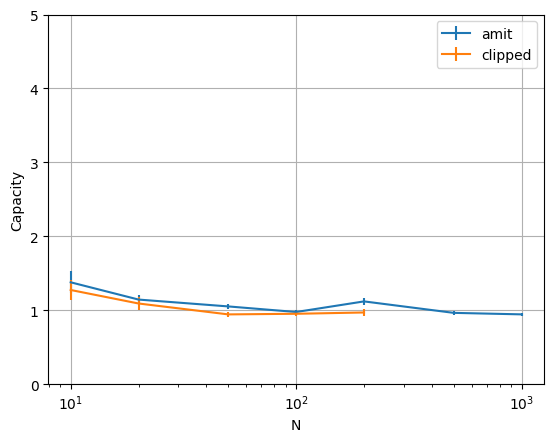

In [15]:
import matplotlib.pyplot as plt

plt.errorbar([c[0] for c in capacity1], [c[1] for c in capacity1], yerr=[c[2] for c in capacity1], label="amit")
plt.errorbar([c[0] for c in capacity2], [c[1] for c in capacity2], yerr=[c[2] for c in capacity2], label="clipped")
plt.xscale("log")
plt.ylim([0, 5])
plt.legend()
plt.xlabel("N")
plt.ylabel("Capacity")
plt.grid(True)
plt.show()


